# Scikit-Learn course 6

## V. Improving model predictions

* **First predictions = baseline predictions.**
* **First model = baseline model.**

> These 2 are generally referred to as **baseline metrics**

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.
<br><br>

### From a data perspective asks:

* **Could we collect more data?** In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.

* **Could we improve our data?** This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.
<br><br>

### From a model perspective asks:

* **Is there a better model we could use?** If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)

* **Could we improve the current model?** If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?
<br><br>

### Hyperparameters vs. Parameters

* **Parameters** = machine learning model seeks to find (cherche à trouver) parameters in data on its own.

* **Hyperparameters** = are settings on a model which a user (you) can adjust.



we'll look at how we could improve our `RandomForestClassifier` and `RandomForestRegressor` models through hyperparameter tuning.
<br>

**Note** : Patterns in data are also often referred to as data parameters.
<br>
**Patterns in data** =  **data parameters**

## 0. stardards import

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# ---> y (axis=1)
# |
# |
# x (axis=0)

## 1. Get the hyperparameters

### 1.1 Classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 1.2 Regressor

In [4]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 2. Tunnig hyperparameters
<br>
Adjusting hyperparameters is usually an experimental process to figure out which are best.

<br>
Three ways to adjust hyperparameters:

* By hand
* Randomly with `RandomSearchCV`
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
* Exhaustively with `GridSearchCV`
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### 2.1 Tuning hyperparameters by hand

![.](images/sklearn-train-valid-test-annotated.png)

#### `RandomForestClassifier`

And we're going to adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [5]:
from sklearn.metrics import (accuracy_score,
                            precision_score, 
                            recall_score,
                            f1_score)
            

In [6]:
def train_valid_test_split(df, target, valid_size=0.15, test_size=0.15, shuffled=True):
  
    n = len(df)
    n_val = round(valid_size * n)
    n_test = round(test_size * n)
    
    if shuffled :
        df = df.sample(frac=1)
        
    X = df.drop(target, axis=1)
    y = df[target]

    X_val, y_val = X[:n_val], y[:n_val]
    X_test, y_test = X[n_val:n_val+n_test], y[n_val:n_val+n_test]
    X_train, y_train = X[n_val+n_test:], y[n_val+n_test:]
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)


In [7]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

### baseline metrics

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Import data :
heart_disease = pd.read_csv("data/heart-disease.csv")b

# Split data
train, val, test = train_valid_test_split(heart_disease, "target")

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(*train) # clf.fit(train[0], train[1])

# Predict
y_preds = clf.predict(val[0])

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(val[1], y_preds) # clf.score(*val) also work but less explaination
baseline_metrics

Acc: 84.44%
Precision: 0.85
Recall: 0.88
F1 score: 0.87


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.87}

In [28]:
len(heart_disease)

303

**changing the n_estmator :**

In [9]:
heart_disease = pd.read_csv("data/heart-disease.csv")
train, val, test = train_valid_test_split(heart_disease, "target")

from statistics import mean

n_estimators_dic = {}
for n in range(10,101,10):
    score = []
    
    # average of 5 (maybe useless)
    for _ in range(5):
        clf_2 = RandomForestClassifier(n_estimators=n)
        clf_2.fit(*train) 
        score.append(clf.score(*val))
    n_estimators_dic[n] = round(mean(score), 2)
    
estimator_sorted = sorted(n_estimators_dic.items(), key=lambda x:x[1]) 
# use the validation set to choose the best hyperparameter

best_n_estimator = estimator_sorted[-1][0]
clf_2 = RandomForestClassifier(n_estimators=best_n_estimator)
clf_2.fit(*train)
y_preds = clf_2.predict(test[0]) # use the test set at the end, because the model never see them
clf_2_metrics = evaluate_preds(test[1], y_preds) 
clf_2_metrics

Acc: 86.67%
Precision: 0.81
Recall: 1.00
F1 score: 0.89


{'accuracy': 0.87, 'precision': 0.81, 'recall': 1.0, 'f1': 0.89}

### 2.2 Hyperparameter tuning with `RandomizedSearchCV`
<br> 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Scikit-Learn's `RandomizedSearchCV` allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

In [10]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {
        "n_estimators": [10, 100, 200, 500, 1000, 1200], # better to use numpy than a list
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6], # better to use numpy than a list
        "min_samples_leaf": [1, 2, 4] # better to use numpy than a list
}
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

max_depth has 4, max_features has 2, min_samples_leaf has 3, min_samples_split has 3, n_estimators has 5.<br>
Then 4x2x3x3x5 = 360 models gonna be tested

We can set the n_iter parameter to limit the number of models RandomizedSearchCV tests.

The results we get will be cross-validated (hence the CV in RandomizedSearchCV) so we can use `train_test_split()`.

And since we're going over so many different models, we'll set `n_jobs` to -1 (sometime 1) of `RandomForestClassifier` so Scikit-Learn takes advantage of all the cores (processors) on our computers.

In [11]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=-1)
# 35s with n_jobs=-1
# 50s with n_jobs=1
# 55s with n_jobs=None

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Controls the verbosity: the higher, the more messages

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

# Fitting 5 folds (cv=5) for each of 20 candidates (n_iter=20), 
# totalling 100 fits

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_feature

In [12]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [13]:
rs_clf.best_score_

0.8678571428571429

Now when we call `predict()` on `rs_clf` (our `RandomizedSearchCV` version of our classifier), it'll use the best hyperparameters it found

In [14]:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 77.05%
Precision: 0.66
Recall: 0.92
F1 score: 0.77


### Learning curve

[learning_curve] Training set sizes: [ 38  55  72  90 107 124 141 158 175 193]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 5.42 s, sys: 565 ms, total: 5.99 s
Wall time: 5.99 s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.0s finished


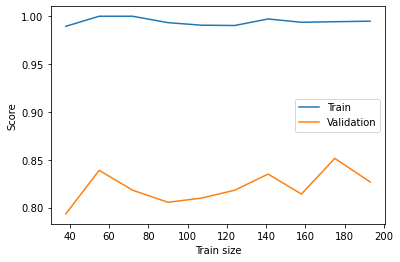

In [29]:
%%time

from sklearn.model_selection import learning_curve

model = RandomForestClassifier(n_jobs=-1, **rs_clf.best_params_)

N, train_score, val_score = learning_curve(model, 
                                           X_train, 
                                           y_train, 
                                           train_sizes=np.linspace(0.2, 1.0, 10), 
                                           cv=5,
                                           verbose=True
                                          )

# dont forget, every score have 5 "version" due to the crosse validation
plt.plot(N, train_score.mean(axis=1), label="Train")
plt.plot(N, val_score.mean(axis=1), label="Validation")
plt.xlabel("Train size")
plt.ylabel("Score")
plt.legend()

### 2.3 Hyperparameter tuning with GridSearchCV
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

The main difference between `GridSearchCV` and `RandomizedSearchCV` is `GridSearchCV` searches across a grid of hyperparameters **exhaustively**, where as, `RandomizedSearchCV` searches across a grid of hyperparameters **randomly** (stopping after n_iter combinations).

`RandomizedSearchCV` try n_iter combinations of different values. Where as, `GridSearchCV` will try every single possible combination.
<br>
That's 4x2x3x3x5 = 360 models!

Since we've already tried to find some ideal hyperparameters using `RandomizedSearchCV`, we'll create another hyperparameter grid based on the `best_params_` of `rs_clf` with less options and then try to use `GridSearchCV` to find a more ideal set.

**Note** : Based on the best_params_ of rs_clf implies the next set of hyperparameters we'll try are roughly in the same range of the best set found by RandomizedSearchCV

In [15]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid_2 = {'n_estimators': [1200, 1500], # better to use numpy than a list
          'max_depth': [None, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6], # better to use numpy than a list
          'min_samples_leaf': [1, 2]}

# That's 2x3x2x2x2 = 72 models in total
# 72models * 5cv = 360
# Fitting 5 folds for each of 72 candidates, totalling 360 fits

In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);
# Fitting 5 folds for each of 72 candidates, totalling 360 fits

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   1.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_s

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   1.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_dep

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_featu

In [17]:
# Check the best hyperparameters found with GridSearchCV
# And by default when we call the predict() function on gs_clf,
# it'll use the best hyperparameters.
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 1200}

In [18]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 77.05%
Precision: 0.76
Recall: 0.81
F1 score: 0.79


Let's create a DataFrame to compare the different metrics

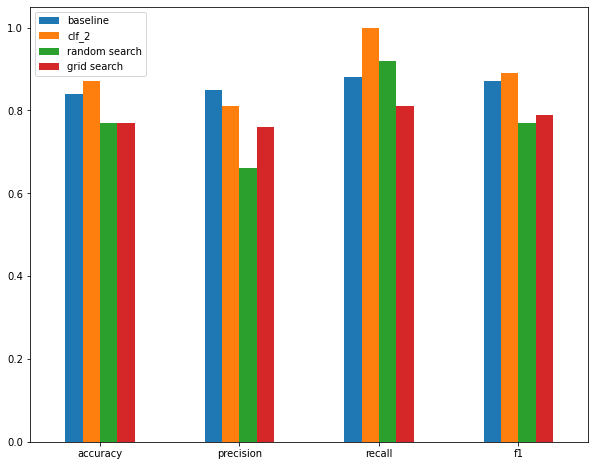

In [19]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8),rot=0);

In [20]:
compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.84,0.87,0.77,0.77
precision,0.85,0.81,0.66,0.76
recall,0.88,1.00,0.92,0.81
f1,0.87,0.89,0.77,0.79
